In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import nltk 

In [2]:
df = pd.read_csv(r"C:\jupyter\all-data.csv", encoding='iso-8859-1',names=['Sentiment','headline'])

In [3]:
df.head()

,Sentiment,headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
df.columns

Index(['Sentiment', 'headline'], dtype='object')

In [5]:
df.shape

(4846, 2)

In [6]:
df

,Sentiment,headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [7]:
#for detecting missing values
df.isnull().sum()

Sentiment    0
headline     0
dtype: int64

In [8]:
df.describe()

,Sentiment,headline
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


In [9]:
duplicates = df[df.duplicated()]
duplicates

,Sentiment,headline
1099,neutral,The issuer is solely responsible for the conte...
1416,neutral,The report profiles 614 companies including ma...
2396,neutral,Ahlstrom 's share is quoted on the NASDAQ OMX ...
2567,neutral,SSH Communications Security Corporation is hea...
3094,neutral,Proha Plc ( Euronext :7327 ) announced today (...
3206,neutral,The company serves customers in various indust...


In [10]:
df.duplicated().sum()

6

In [11]:
# We'll drop duplicates and reset index
df = df.drop_duplicates().reset_index(drop=True)

In [12]:
df.shape

(4840, 2)

In [13]:
df.Sentiment.value_counts()

Sentiment
neutral     2873
positive    1363
negative     604
Name: count, dtype: int64

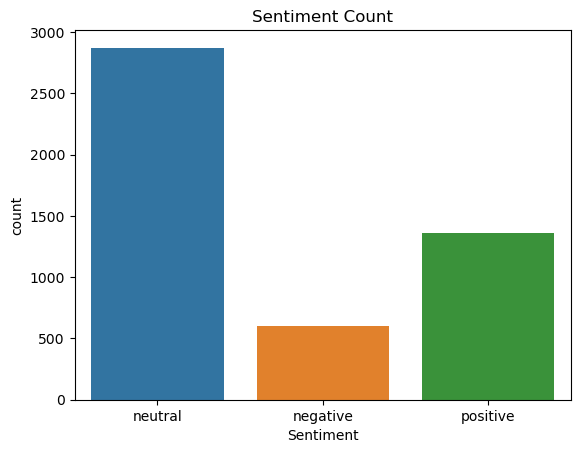

In [14]:
plt.title('Sentiment Count')
sns.countplot(data=df,x='Sentiment')
plt.show()

In [15]:
# Identify rows with 'neutral' sentiment
neutral_indices = df[df['Sentiment'] == 'neutral'].index

# Randomly select half of the neutral rows to remove
remove_indices = random.sample(list(neutral_indices), k=int(len(neutral_indices) / 2))

# Remove selected rows
df = df.drop(remove_indices).reset_index(drop=True)

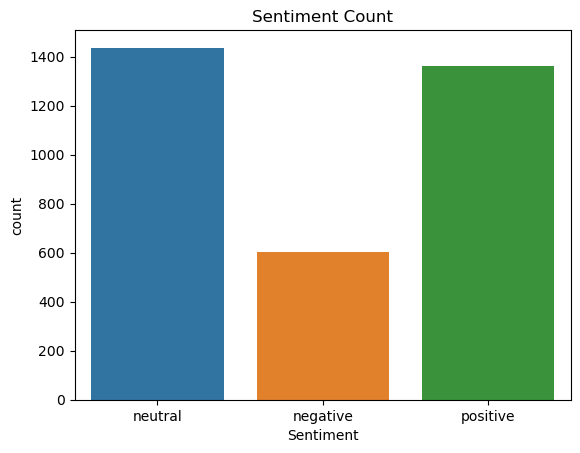

In [16]:
plt.title('Sentiment Count')
sns.countplot(data=df,x='Sentiment')
plt.show()

In [17]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem import WordNetLemmatizer

In [18]:
#Data cleaning and preprocessing
import re
ps=PorterStemmer()
wordnet= WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['headline'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus

# here stemming proved to better than lemmatization here...i have checked with both of them 

['accord gran compani plan move product russia although compani grow',
 'intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report',
 'new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit',
 'accord compani updat strategi year baswar target long term net sale growth rang oper profit margin net sale',
 'financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb',
 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur',
 'third quarter net sale increas eur mn oper profit eur mn',
 'oper profit rose eur mn eur mn correspond period repres net sale',
 'oper profit total eur mn eur mn repres net sale',
 'teliasonera tlsn said offer line strategi increas ownership core busi hold would strengthen eesti

In [77]:
### Creating the bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=2500,ngram_range=(1,3))
X= cv.fit_transform(corpus).toarray()

In [78]:
cv

CountVectorizer(max_features=2500, ngram_range=(1, 3))

In [79]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [96]:
# Convert y to single column of class labels
y = df['Sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2}).values

In [97]:
y

array([1, 0, 2, ..., 0, 0, 0], dtype=int64)

In [98]:
import numpy as np
np.unique(y)

array([0, 1, 2], dtype=int64)

In [105]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Testing for different models

In [106]:
#Importing different models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.simplefilter(action='ignore')

In [107]:
# Define the models in a dictionary
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "SVM": SVC(kernel='sigmoid'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(silent=True)
}

In [108]:
# Train and predict with each model, storing the metrics
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict using the model
    y_pred = model.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Store the results
    results[model_name] = { "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

In [109]:
# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}\n")


Model: Naive Bayes
  Accuracy: 0.6373
  Precision: 0.6527
  Recall: 0.6373
  F1 Score: 0.6252

Model: Logistic Regression
  Accuracy: 0.7210
  Precision: 0.7222
  Recall: 0.7210
  F1 Score: 0.7199

Model: Random Forest
  Accuracy: 0.7166
  Precision: 0.7225
  Recall: 0.7166
  F1 Score: 0.7113

Model: SVM
  Accuracy: 0.6711
  Precision: 0.6775
  Recall: 0.6711
  F1 Score: 0.6646

Model: Gradient Boosting
  Accuracy: 0.7239
  Precision: 0.7484
  Recall: 0.7239
  F1 Score: 0.7209

Model: AdaBoost
  Accuracy: 0.6402
  Precision: 0.6456
  Recall: 0.6402
  F1 Score: 0.6371

Model: XGBoost
  Accuracy: 0.7225
  Precision: 0.7300
  Recall: 0.7225
  F1 Score: 0.7200

Model: CatBoost
  Accuracy: 0.7342
  Precision: 0.7483
  Recall: 0.7342
  F1 Score: 0.7316



In [110]:
# Identify the best model based on F1 Score
best_model = max(results, key=lambda x: results[x]["F1 Score"])
print(f"Best Model: {best_model} with F1 Score: {results[best_model]['F1 Score']:.4f}")

Best Model: CatBoost with F1 Score: 0.7316


In [111]:
best_model =  RandomForestClassifier(n_estimators=200)
best_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [112]:
def sentiment_analysis(input_sentence):
    # Convert the headline into a list because predict method expects a 2D array
    headline_vectorized = cv.transform([input_sentence]).toarray()
    
    # Predict sentiment
    prediction = best_model.predict(headline_vectorized)[0]
    prediction_probability = best_model.predict_proba(headline_vectorized)[0]
    
    # Refine prediction based on probability thresholds
    if prediction_probability[0] >= 0.15:
        sentiment = 'negative'
    elif prediction_probability[2] >= 0.20:
        sentiment = 'positive'
    else:
        sentiment = 'neutral'
    
    sentiment_probability = {
        'negative': prediction_probability[0],
        'neutral': prediction_probability[1],
        'positive': prediction_probability[2]
    }
    
    return sentiment, sentiment_probability


### The main problem in the sentiment_analysis is occuring because of the data imbalance, I tried SMOTE but it wasn't working that much. So, I tried by deleting half rows of nuetral columns as there was a high bias towards them , and from then on the performance of the sentiment_analysis function has increased.Also, so to avoid the bias(as nuetral data is making imbalances) , we'll adjust the threshold of +ve and -ve

In [113]:
# Example usage:1
result, probabilities = sentiment_analysis("the investors are thinking that this season will bring better growth opportunities")
print(f"Sentiment: {result}")
print(f"Probabilities: {probabilities}")

Sentiment: positive
Probabilities: {'negative': 0.03, 'neutral': 0.315, 'positive': 0.655}


In [114]:
# Example usage:2
result, probabilities = sentiment_analysis("Stocks in the tech sector seemed to drop dead after the unexpected announcement of reduced earnings forecasts")
print(f"Sentiment: {result}")
print(f"Probabilities: {probabilities}")

Sentiment: negative
Probabilities: {'negative': 0.44, 'neutral': 0.545, 'positive': 0.015}


In [115]:
# Example usage:3
result, probabilities = sentiment_analysis("Stock prices remained stable")
print(f"Sentiment: {result}")
print(f"Probabilities: {probabilities}")

Sentiment: neutral
Probabilities: {'negative': 0.065, 'neutral': 0.865, 'positive': 0.07}


In [116]:
# Example usage:4
result, probabilities = sentiment_analysis("Our superior customer centricity and expertise in digital services set us apart from our competitors")
print(f"Sentiment: {result}")
print(f"Probabilities: {probabilities}")

Sentiment: positive
Probabilities: {'negative': 0.035, 'neutral': 0.71, 'positive': 0.255}


In [117]:
# Example usage:5
result, probabilities = sentiment_analysis("the CEO of apple is resigning.")
print(f"Sentiment: {result}")
print(f"Probabilities: {probabilities}")

Sentiment: neutral
Probabilities: {'negative': 0.005, 'neutral': 0.965, 'positive': 0.03}
